## Imports

In [113]:
import pandas as pd
import matplotlib.pyplot as plt

## Getting the data ready to be analized

In [114]:
catalan_language_knowledge_df = pd.read_json('../../wikidump/output_language_refactored/cawiki_20210201_refactored_language_dataset.json.gz', compression='gzip', lines=True)
# catalan_language_knowledge_df.head()

Number of rows and columns

In [115]:
catalan_language_knowledge_df.shape

(4037, 5)

Info about the datatype of the Pandas dataframe

In [116]:
catalan_language_knowledge_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4037 entries, 0 to 4036
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_date               4037 non-null   object
 1   num_languages_declared  4037 non-null   int64 
 2   name                    4037 non-null   object
 3   id                      4037 non-null   int64 
 4   languages               4037 non-null   object
dtypes: int64(2), object(3)
memory usage: 157.8+ KB


Basic stats

In [117]:
catalan_language_knowledge_df.describe()

,num_languages_declared,id
count,4037.000000,4.037000e+03
mean,3.973000,6.198418e+05
std,2.082542,4.591174e+05
min,1.000000,5.668000e+03
25%,3.000000,2.601990e+05
50%,4.000000,4.756440e+05
75%,5.000000,9.641510e+05
max,28.000000,1.832285e+06


Exploding the languages array into something more readable

In [118]:
catalan_languages_refactored_df = list()
# iterating over the previous dataset
for i, row in catalan_language_knowledge_df.iterrows():
    # explicit the language and the knowledge, a line for each occurrence in languages list
    for el in row['languages']:
        new_row = row
        new_row = new_row.drop('languages')
        new_row['language'] = el['lang']
        new_row['level'] = el['level']
        catalan_languages_refactored_df.append(new_row)
# build a new dataframe
catalan_languages_refactored_df = pd.DataFrame(catalan_languages_refactored_df).reset_index(drop=True)
# catalan_languages_refactored_df.head()

Number of elements in the dataset

In [119]:
catalan_languages_refactored_df.shape

(16078, 6)

Some info about the datatypes

In [120]:
catalan_languages_refactored_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16078 entries, 0 to 16077
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   edit_date               16078 non-null  object
 1   num_languages_declared  16078 non-null  int64 
 2   name                    16078 non-null  object
 3   id                      16078 non-null  int64 
 4   language                16078 non-null  object
 5   level                   16078 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 753.8+ KB


Basic stats

In [121]:
catalan_languages_refactored_df.describe()

,num_languages_declared,id,level
count,16078.000000,1.607800e+04,16078.000000
mean,5.062259,6.238127e+05,3.171352
std,2.708273,4.733807e+05,2.140068
min,1.000000,5.668000e+03,0.000000
25%,3.000000,2.334670e+05,1.000000
50%,4.000000,4.758410e+05,3.000000
75%,6.000000,9.817428e+05,6.000000
max,28.000000,1.832285e+06,6.000000


### Data cleaning

Null values

In [122]:
catalan_languages_refactored_df.isnull().sum()

edit_date                 0
num_languages_declared    0
name                      0
id                        0
language                  0
level                     0
dtype: int64

Count all not null values

In [123]:
catalan_languages_refactored_df.notnull().sum()

edit_date                 16078
num_languages_declared    16078
name                      16078
id                        16078
language                  16078
level                     16078
dtype: int64

# Basic plots

## Show the language occurrences specifications

Language and the associated count (the level associated should be greater than 0)

In [124]:
most_declared_languages = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] > 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
most_declared_languages.head()

,language,count
26,english,3379
92,spanish,2581
17,catalan,2466
31,french,1674
35,german,1007


In [125]:
most_declared_languages.shape

(109, 2)

In [126]:
most_declared_languages.describe()

,count
count,109.000000
mean,134.339450
std,499.116334
min,1.000000
25%,1.000000
50%,6.000000
75%,38.000000
max,3379.000000


Occurrences bar graph

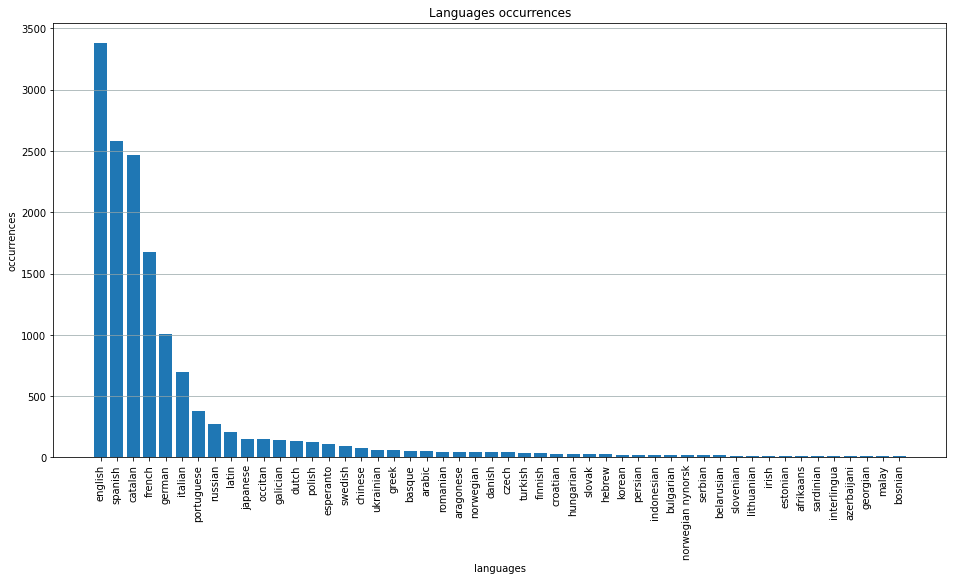

In [127]:
first_fifty = most_declared_languages[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

#### Pie chart of the languages with the greatest number of occurrences

The 6 most known languages compared to the other

In [128]:
split_index = 6
most_declared_languages_six = most_declared_languages[:split_index]
other = most_declared_languages[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
most_declared_languages_six = most_declared_languages_six.append(other, ignore_index = True)
most_declared_languages_six

,language,count
0,english,3379
1,spanish,2581
2,catalan,2466
3,french,1674
4,german,1007
5,italian,694
6,other,2842


Plot a pie chart

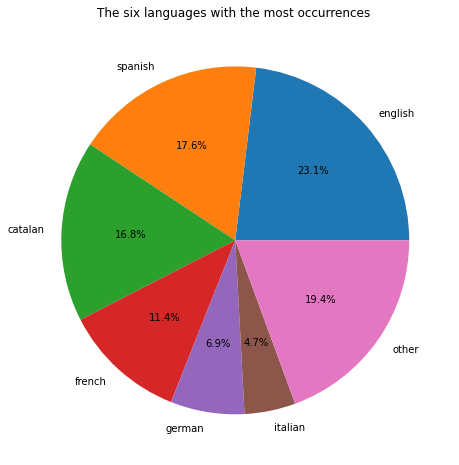

In [129]:
plt.figure(figsize=(16,8))
plt.pie(most_declared_languages_six['count'], labels=most_declared_languages_six['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences ')
plt.show()

Occurrences

In [130]:
occurrences = catalan_languages_refactored_df.groupby(['language', 'level']).size().to_frame('count').reset_index().set_index(['language', 'level']).sort_values('count', ascending=False) 
occurrences.head()

,,count
language,level,
catalan,6,1871
spanish,6,1352
english,3,1346
catalan,0,1186
english,2,1048


Simple bar chart

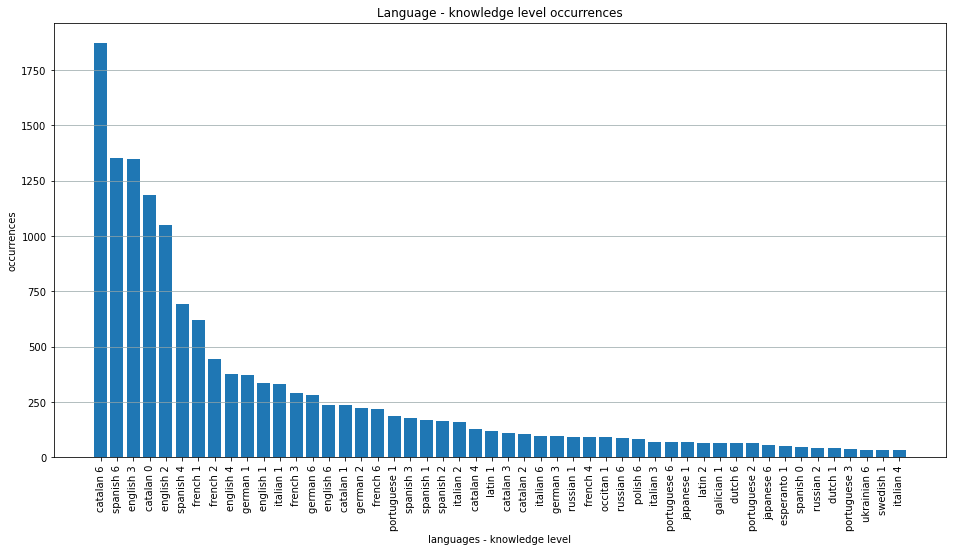

In [131]:
first_fifty = occurrences[:50]
labels = [ ' '.join([str(value[0]), str(value[1])]) for value in first_fifty.index.values ]
plt.figure(figsize=(16,8))
plt.bar(labels, first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Language - knowledge level occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages - knowledge level')
plt.show()

## Bar chart of means

In [132]:
means = catalan_languages_refactored_df.groupby(['language'])['level'].mean().to_frame('mean').reset_index().sort_values('mean', ascending=False)
means.head()

,language,mean
55,kurdish,6.0
13,bengali,6.0
105,walloon,6.0
98,telugu,6.0
96,tagalog,6.0


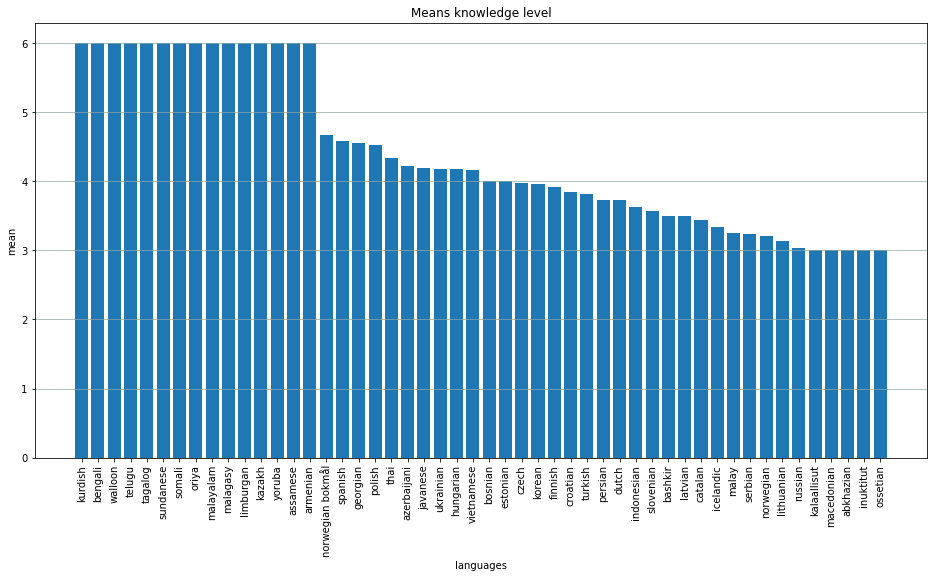

In [133]:
first_fifty = means[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['mean'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Means knowledge level')
plt.ylabel('mean')
plt.xlabel('languages')
plt.show()

## Native speaker analysis

In [134]:
native_speaker = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 6,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
native_speaker.head()

,language,count
11,catalan,1871
60,spanish,1352
24,german,283
17,english,239
21,french,218


Dimension

In [135]:
native_speaker.shape

(73, 2)

Bar chart

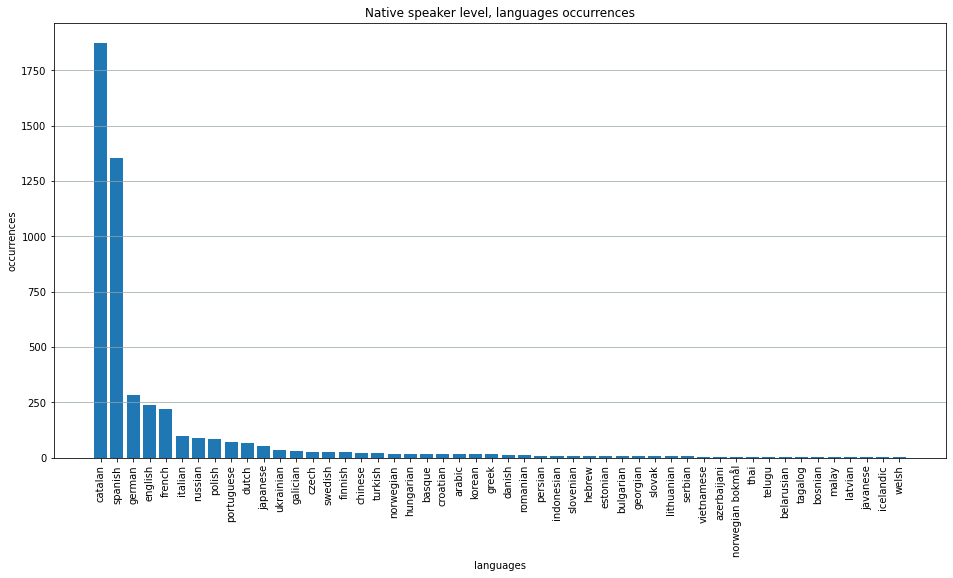

In [136]:
first_fifty = native_speaker[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Native speaker level, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six most known languages

In [137]:
split_index = 6
most_declared_languages_six = native_speaker[:split_index]
other = native_speaker[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
native_speaker = most_declared_languages_six.append(other, ignore_index = True)
native_speaker

,language,count
0,catalan,1871
1,spanish,1352
2,german,283
3,english,239
4,french,218
5,italian,98
6,other,800


Pie chart using the six most known languages

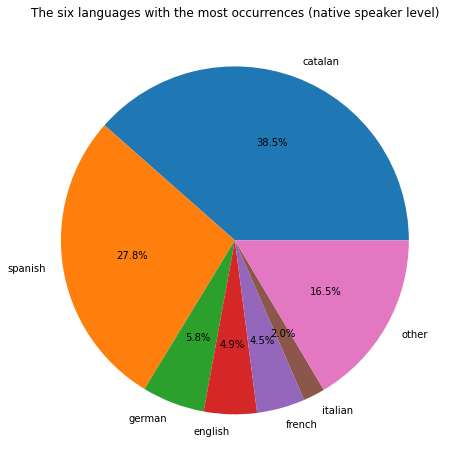

In [138]:
plt.figure(figsize=(16,8))
plt.pie(native_speaker['count'], labels=native_speaker['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (native speaker level)')
plt.show()

## Level 5 language knowledge

In [139]:
level_five = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 5,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_five.head()

,language,count
3,english,33
10,spanish,25
1,catalan,12
4,french,3
6,german,2


Dimension

In [140]:
level_five.shape

(11, 2)

Bar chart

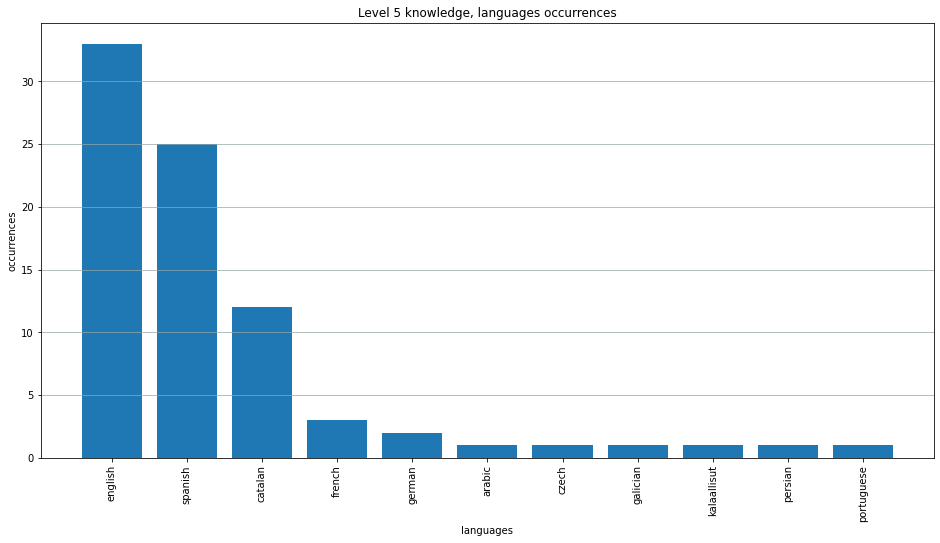

In [141]:
first_fifty = level_five[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 5 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

Retrieve the six languages with the greatest amount of occurrences

In [142]:
split_index = 6
most_declared_languages_six = level_five[:split_index]
other = level_five[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_five = most_declared_languages_six.append(other, ignore_index = True)
level_five

,language,count
0,english,33
1,spanish,25
2,catalan,12
3,french,3
4,german,2
5,arabic,1
6,other,5


Pie chart

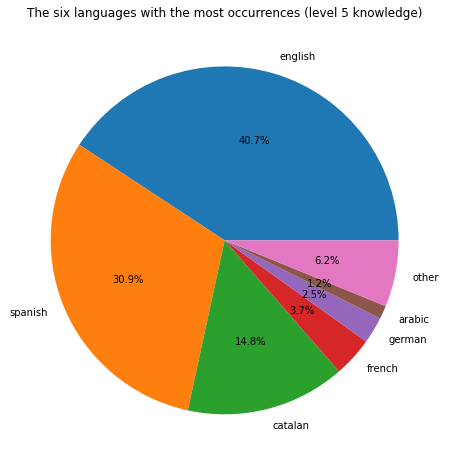

In [143]:
plt.figure(figsize=(16,8))
plt.pie(level_five['count'], labels=level_five['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 5 knowledge)')
plt.show()

## Level 4 language knowledge

In [144]:
level_four = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 4,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_four.head()

,language,count
33,spanish,693
10,english,377
6,catalan,127
12,french,94
20,italian,34


In [145]:
level_four.shape

(36, 2)

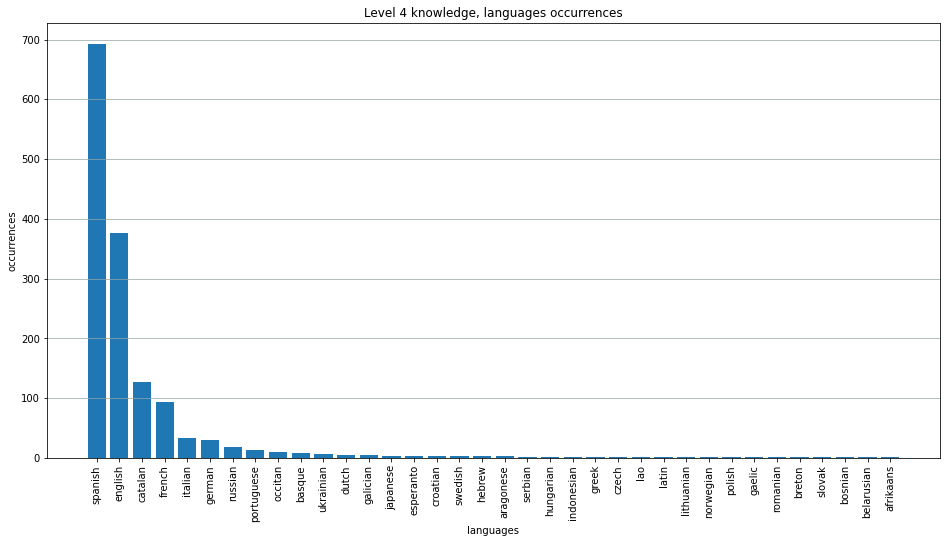

In [146]:
first_fifty = level_four[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 4 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [147]:
split_index = 6
most_declared_languages_six = level_four[:split_index]
other = level_four[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_four = most_declared_languages_six.append(other, ignore_index = True)
level_four

,language,count
0,spanish,693
1,english,377
2,catalan,127
3,french,94
4,italian,34
5,german,30
6,other,106


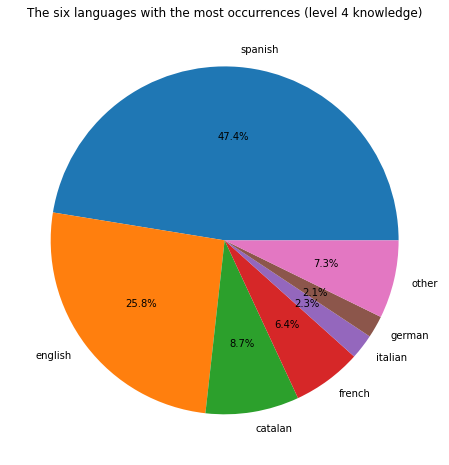

In [148]:
plt.figure(figsize=(16,8))
plt.pie(level_four['count'], labels=level_four['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 4 knowledge)')
plt.show()

## Level 3 language knowledge

In [149]:
level_three = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 3,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_three.head()

,language,count
14,english,1346
18,french,293
49,spanish,178
8,catalan,112
21,german,98


In [150]:
level_three.shape

(54, 2)

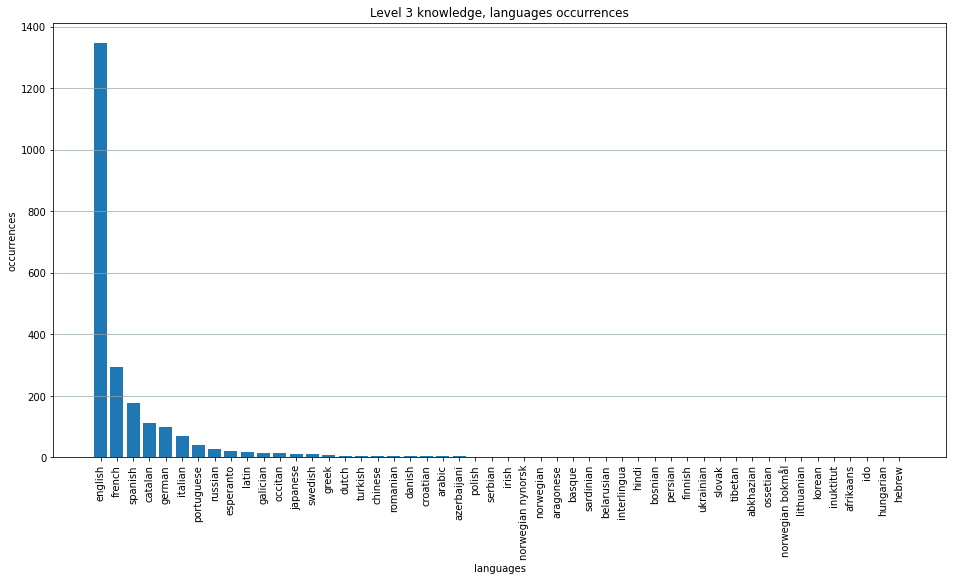

In [151]:
first_fifty = level_three[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 3 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [152]:
split_index = 6
most_declared_languages_six = level_three[:split_index]
other = level_three[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_three = most_declared_languages_six.append(other, ignore_index = True)
level_three

,language,count
0,english,1346
1,french,293
2,spanish,178
3,catalan,112
4,german,98
5,italian,71
6,other,250


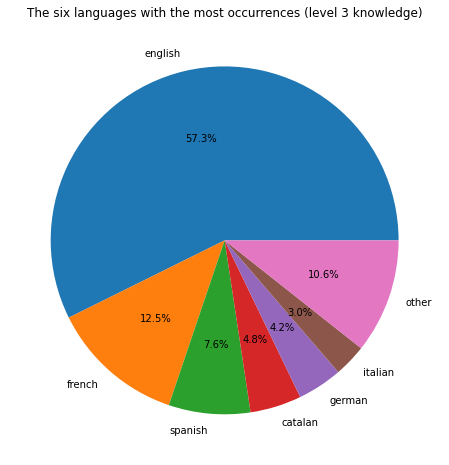

In [153]:
plt.figure(figsize=(16,8))
plt.pie(level_three['count'], labels=level_three['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 3 knowledge)')
plt.show()

## Level 2 language knowledge

In [154]:
level_two = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 2,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_two.head()

,language,count
15,english,1048
18,french,446
21,german,223
50,spanish,163
30,italian,161


In [155]:
level_two.shape

(56, 2)

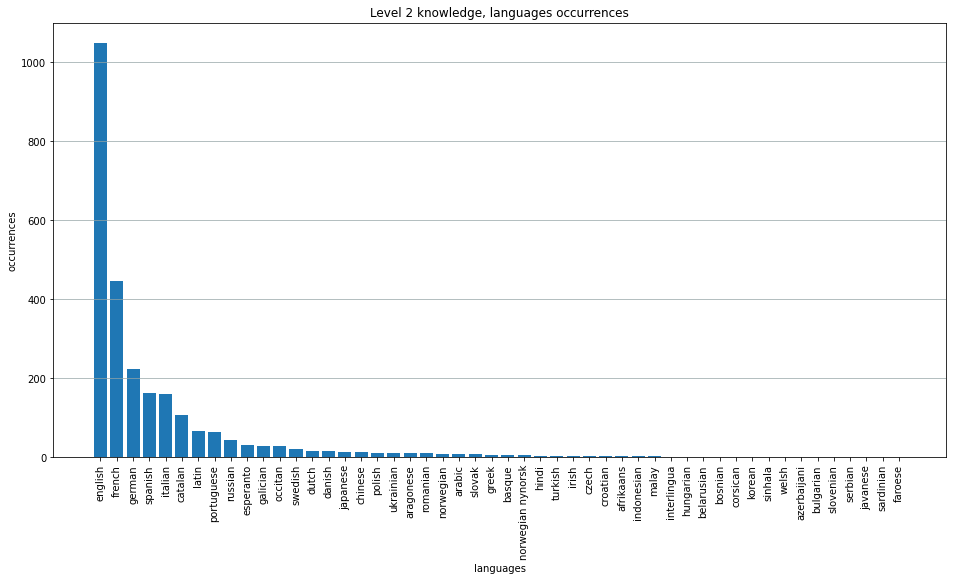

In [156]:
first_fifty = level_two[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 2 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [157]:
split_index = 6
most_declared_languages_six = level_two[:split_index]
other = level_two[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_two = most_declared_languages_six.append(other, ignore_index = True)
level_two

,language,count
0,english,1048
1,french,446
2,german,223
3,spanish,163
4,italian,161
5,catalan,108
6,other,489


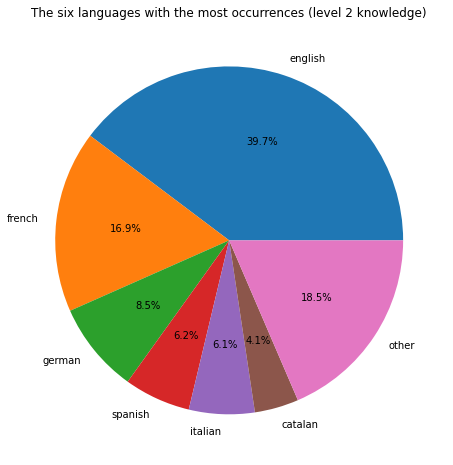

In [158]:
plt.figure(figsize=(16,8))
plt.pie(level_two['count'], labels=level_two['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 2 knowledge)')
plt.show()

## Level 1 language knowledge

In [159]:
level_one = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 1,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_one.head()

,language,count
24,french,620
28,german,371
19,english,336
38,italian,330
10,catalan,236


In [160]:
level_one.shape

(84, 2)

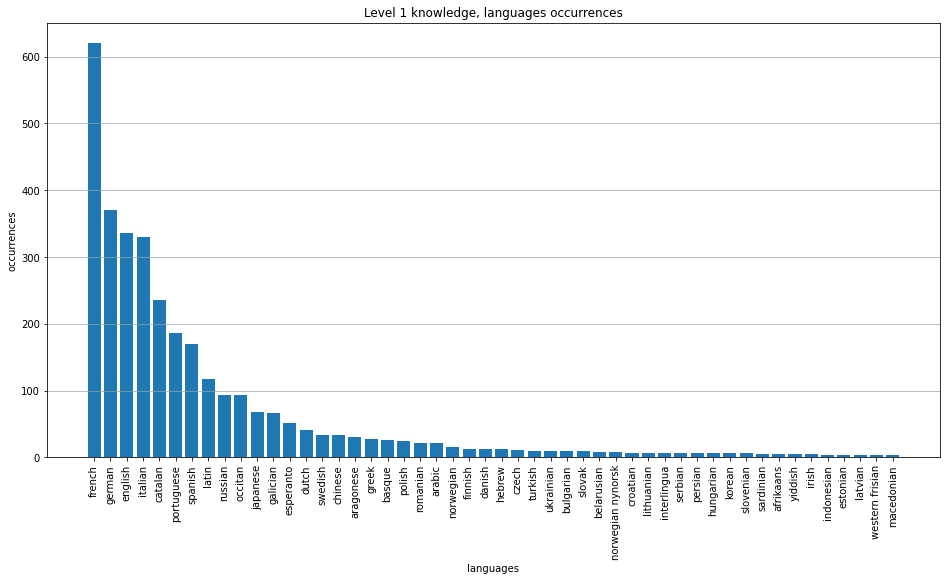

In [161]:
first_fifty = level_one[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 1 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [162]:
split_index = 6
most_declared_languages_six = level_one[:split_index]
other = level_one[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_one = most_declared_languages_six.append(other, ignore_index = True)
level_one

,language,count
0,french,620
1,german,371
2,english,336
3,italian,330
4,catalan,236
5,portuguese,187
6,other,1174


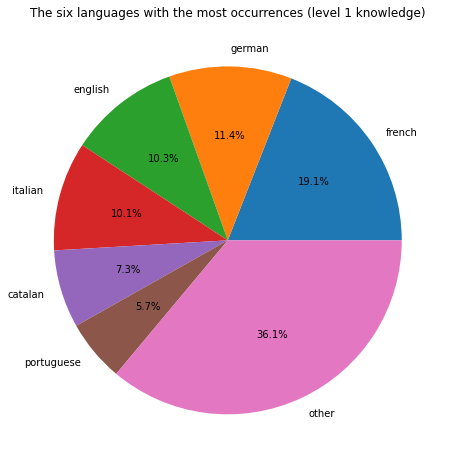

In [163]:
plt.figure(figsize=(16,8))
plt.pie(level_one['count'], labels=level_one['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 1 knowledge)')
plt.show()

## Level 0 language knowledge

In [164]:
level_zero = catalan_languages_refactored_df.loc[catalan_languages_refactored_df['level'] == 0,['language', 'level']].groupby(['language']).count().reset_index().set_axis(['language','count'], axis=1).sort_values('count', ascending=False) 
level_zero.head()

,language,count
7,catalan,1186
39,spanish,45
18,german,25
16,french,19
25,italian,19


In [165]:
level_zero.shape

(47, 2)

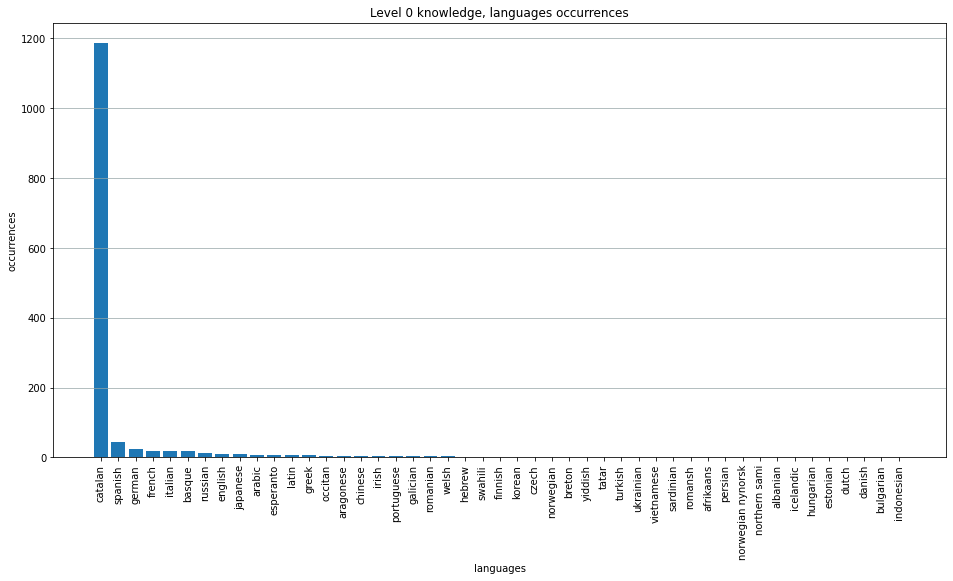

In [166]:
first_fifty = level_zero[:50]
plt.figure(figsize=(16,8))
plt.bar(first_fifty['language'], first_fifty['count'])
plt.grid(color='#95a5a6', linestyle='-', linewidth=1, axis='y', alpha=0.7)
plt.xticks(rotation='vertical')
plt.title('Level 0 knowledge, languages occurrences')
plt.ylabel('occurrences')
plt.xlabel('languages')
plt.show()

In [167]:
split_index = 6
most_declared_languages_six = level_zero[:split_index]
other = level_zero[split_index:].loc[:,['count']].sum().to_frame().reset_index(drop=True).set_axis(['count'], axis=1)
other = other.assign(language='other')
level_zero = most_declared_languages_six.append(other, ignore_index = True)
level_zero

,language,count
0,catalan,1186
1,spanish,45
2,german,25
3,french,19
4,italian,19
5,basque,17
6,other,124


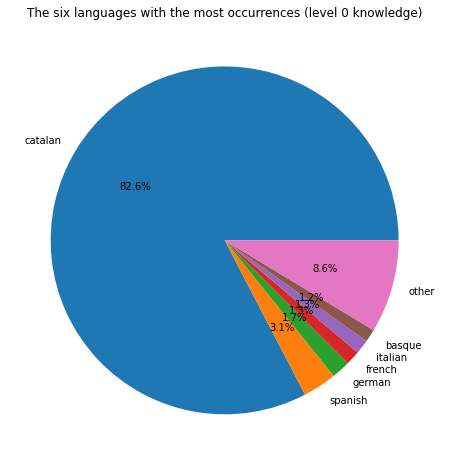

In [168]:
plt.figure(figsize=(16,8))
plt.pie(level_zero['count'], labels=level_zero['language'], autopct='%.1f%%')
plt.title('The six languages with the most occurrences (level 0 knowledge)')
plt.show()